In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
pip install transformers

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input,GlobalMaxPool1D,Dropout
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import Input,GlobalMaxPool1D,Dropout,concatenate
from tensorflow.keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import nltk
import re
from nltk.corpus import stopwords #corpus is collection of text
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

In [ ]:
data=pd.read_csv('/content/task3_engslish_training.csv')

In [ ]:
test=pd.read_csv('/content/English_data_test_release.csv')

In [ ]:
test.head()

,ID,text,title
0,122653045997905671927713471889615536378,The deputy secretary at the US Treasury has sa...,US Treasury deputy sec warns that shortages li...
1,275389285957305997321446227088442471741,KABUL—Approximately twelve minutes after U.S. ...,CNN Praises Taliban For Wearing Masks During A...
2,333248764296609831067233855420575814716,The vast majority of (oblivious) Americans hav...,Tennessee Has Just LEGALIZED Government COVID ...
3,264019763253447756851916399533799891538,(Natural News) There’s a secret layer of infor...,MEDICAL SHOCKER: Scientists at Sloan Kettering...
4,158073737187690682830899773280916034317,"A recent study reported by the NCBI, which is ...",Study Results: Facemasks are Ineffective to Bl...


In [ ]:
data.head()

,public_id,text,title,our rating
0,1145ea7c,U.S. military officials worked to ensure Presi...,The Texas State Senate – Senator Paul Bettenco...,TRUE
1,2d06d27c,"A 2,500-strong border and coastguard corps cou...",EU army to protect borders,false
2,65d9521c,The federal government has asked school admini...,Emmett Till’s Memorial Sign Shot Up again 35 d...,false
3,e122d505,"Extremely hot days, when temperatures soar to ...",95-Degree Days: How Extreme Heat Could Spread ...,true
4,ad091373,"Rep.Thierry, Shawn Gov. Abbott Grants Sen. Kol...",Texas House of Representatives,partially false


In [ ]:
def lower(text):
    lowercase_text = [word.lower() for word in text.split()]
    text=" ".join(lowercase_text)
    return text

In [ ]:
data['text'] = data['text'].astype(str).apply(lambda x:lower(x))
data['title'] = data['title'].astype(str).apply(lambda x:lower(x))
test['text'] = test['text'].astype(str).apply(lambda x:lower(x))
test['title'] = test['title'].astype(str).apply(lambda x:lower(x))

In [ ]:
import string
lista=string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in lista]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
data['text'] = data['text'].apply(lambda x: remove_punctuation(x))
data['title'] = data['title'].apply(lambda x: remove_punctuation(x))
test['text'] = test['text'].astype(str).apply(lambda x:remove_punctuation(x))
test['title'] = test['title'].astype(str).apply(lambda x:remove_punctuation(x))

In [ ]:
import nltk
nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data['title'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test['text'] = test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test['title'] = test['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])
data['text'] = data.text.apply(lemmatize_text)
data['title'] = data.title.apply(lemmatize_text)
test['text'] = test.text.apply(lemmatize_text)
test['title'] = test.title.apply(lemmatize_text)

In [ ]:
data.head()

,public_id,text,title,our rating
0,1145ea7c,u military official worked ensure president tr...,texas state senate – senator paul bettencourt ...,TRUE
1,2d06d27c,2500strong border coastguard corp could see ar...,eu army protect border,false
2,65d9521c,federal government asked school administrator ...,emmett till’s memorial sign shot 35 day replaced,false
3,e122d505,extremely hot day temperature soar 95 degree f...,95degree day extreme heat could spread across ...,true
4,ad091373,repthierry shawn gov abbott grant sen kolkhors...,texas house representative,partially false


In [ ]:
for i in range(len(data)):
    if data['our rating'][i] in ['TRUE','FALSE']:        
        data['our rating'][i]=data['our rating'][i].lower()

In [ ]:
print(len(data))

1264


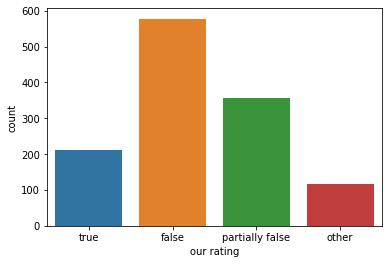

In [ ]:
import seaborn as sns
sns.countplot(x='our rating', data=data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   public_id   1264 non-null   object
 1   text        1264 non-null   object
 2   title       1264 non-null   object
 3   our rating  1264 non-null   object
dtypes: object(4)
memory usage: 39.6+ KB


In [ ]:
data.isnull().sum()

public_id     0
text          0
title         0
our rating    0
dtype: int64

In [ ]:
# True = Class 0
# False = Class 1
# Partially False = Class 3
# Other = Class 4

In [ ]:
def replace_title(txt):
    if(txt==''):
        txt.replace('', data['text'])
    

In [ ]:
data['title']=data['title'].fillna('')
for i in range(len(data)):
    if data['title'][i]=='':
        data['title'][i]=data['text'][i]

In [ ]:
data["our rating"] = np.where(data["our rating"] == "partially false", 2, data["our rating"])
data["our rating"] = np.where(data["our rating"] == "false", 1, data["our rating"])
data["our rating"] = np.where(data["our rating"] == "true", 0, data["our rating"])
data["our rating"] = np.where(data["our rating"] == "other", 3, data["our rating"])

In [ ]:
data.head()

,public_id,text,title,our rating
0,1145ea7c,u military official worked ensure president tr...,texas state senate – senator paul bettencourt ...,0
1,2d06d27c,2500strong border coastguard corp could see ar...,eu army protect border,1
2,65d9521c,federal government asked school administrator ...,emmett till’s memorial sign shot 35 day replaced,1
3,e122d505,extremely hot day temperature soar 95 degree f...,95degree day extreme heat could spread across ...,0
4,ad091373,repthierry shawn gov abbott grant sen kolkhors...,texas house representative,2


In [ ]:
list_classes = ["true", "false", "partially false", "other"]

In [ ]:
# get label
X=data.drop(['our rating'],axis=1)
y=data['our rating'].values

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,shuffle=True, random_state=42,stratify=y)

In [ ]:
X_train_text=X['text'].values
X_train_title=X['title'].values
y_train=tf.keras.utils.to_categorical(y)
X_test_text=test['text'].values
X_test_title=test['title'].values


In [ ]:
# X_test_text=X_test['text'].values
# X_test_title=X_test['title'].values

In [ ]:
#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel,TFAutoModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel     

In [ ]:
tokenizer =BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
MAX_LEN=128

In [ ]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            pad_to_max_length = True,
            return_attention_mask=True,
            truncation=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [ ]:
title_input_ids, title_attention_masks = tokenize(X_train_title, MAX_LEN)
text_input_ids, text_attention_masks = tokenize(X_train_text, MAX_LEN)
title_input_test, title_attention_test = tokenize(X_test_title, MAX_LEN)
text_input_test, text_attention_test = tokenize(X_test_text, MAX_LEN)

In [ ]:
roberta_model = TFBertModel.from_pretrained('bert-base-uncased')
roberta_model2 = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are in

In [ ]:
import tensorflow as tf

In [ ]:
def create_model(bert_model,bert_model2,learning, max_len=MAX_LEN):
    
    opt = tf.keras.optimizers.Adam(learning_rate=learning)
    input_title = tf.keras.Input(shape=(max_len,),dtype='int32')
    attention_title = tf.keras.Input(shape=(max_len,),dtype='int32')
    input_text=tf.keras.Input(shape=(max_len,),dtype='int32')
    attention_text=tf.keras.Input(shape=(max_len,),dtype='int32')
    
    output1 = bert_model([input_title,attention_title])[0]
    output1 = tf.keras.layers.GlobalMaxPooling1D()(output1)
    output1 = tf.keras.layers.Dropout(0.1)(output1)

    
    
    output2=bert_model2([input_text,attention_text])[0]
    output2=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True, dropout=0.3))(output2)
    #output2=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True, dropout=0.3))(output2)
    output2 = tf.keras.layers.GlobalMaxPooling1D()(output2)
    output2 = tf.keras.layers.Dropout(0.1)(output2)

    ensembled= concatenate([output1,output2],axis=-1) 
    
    output = tf.keras.layers.Dense(4, activation='softmax')(ensembled)
    model = tf.keras.models.Model(inputs = ([input_title,attention_title],[input_text,attention_text]),outputs = output)
    model.compile(opt,loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
print(MAX_LEN)

128


In [ ]:
model = create_model(roberta_model,roberta_model2,2e-5,MAX_LEN)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 128)]        0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 128)]        0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 128)]        0           []                               
                                                                                            

In [ ]:
history = model.fit([[title_input_ids,title_attention_masks],[text_input_ids,text_attention_masks]], y_train, validation_split=0.2, epochs=10, batch_size=22)

Epoch 1/10
46/46 [==============================] - 150s 3s/step - loss: 0.5725 - accuracy: 0.4085 - val_loss: 0.4843 - val_accuracy: 0.4783
Epoch 2/10
46/46 [==============================] - 110s 2s/step - loss: 0.4704 - accuracy: 0.5134 - val_loss: 0.4623 - val_accuracy: 0.5613
Epoch 3/10
46/46 [==============================] - 110s 2s/step - loss: 0.4060 - accuracy: 0.6291 - val_loss: 0.4204 - val_accuracy: 0.6324
Epoch 4/10
46/46 [==============================] - 110s 2s/step - loss: 0.3303 - accuracy: 0.7132 - val_loss: 0.4147 - val_accuracy: 0.6640
Epoch 5/10
46/46 [==============================] - 110s 2s/step - loss: 0.2320 - accuracy: 0.8427 - val_loss: 0.4918 - val_accuracy: 0.5652
Epoch 6/10
46/46 [==============================] - 109s 2s/step - loss: 0.1608 - accuracy: 0.9100 - val_loss: 0.5215 - val_accuracy: 0.5850
Epoch 7/10
46/46 [==============================] - 109s 2s/step - loss: 0.0908 - accuracy: 0.9693 - val_loss: 0.5891 - val_accuracy: 0.5731
Epoch 8/10
46

In [ ]:
y_preds=model.predict([[title_input_test,title_attention_test],[text_input_test,text_attention_test]])

In [ ]:
y_preds

array([[1.1325876e-03, 9.6365666e-01, 3.4477074e-02, 7.3369074e-04],
       [9.7382031e-02, 8.9681071e-01, 2.4251859e-03, 3.3820353e-03],
       [1.6778566e-06, 9.9997067e-01, 3.4034470e-06, 2.4297824e-05],
       ...,
       [2.9199253e-04, 2.0485257e-01, 7.9354930e-01, 1.3061025e-03],
       [1.1509000e-04, 9.4440156e-01, 1.0715559e-02, 4.4767801e-02],
       [2.2966424e-02, 7.2681558e-01, 2.3163341e-01, 1.8584583e-02]],
      dtype=float32)

In [ ]:
y_preds=np.argmax(y_preds,axis=1)

In [ ]:
y_preds

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2,
       1, 1, 0, 2, 2, 0, 1, 2, 2, 3, 3, 0, 2, 2, 2, 1, 3, 0, 1, 1, 2, 1,
       0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2,
       2, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0,
       1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 3, 1, 0, 1, 1,
       1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 0, 1, 0,

In [ ]:
submission=pd.DataFrame(columns=['public_id','predicted_rating'])
submission['public_id']=test['ID']
submission['predicted_rating']=y_preds

In [ ]:
submission['predicted_rating'] = np.where(submission['predicted_rating'] == '2',"partially false", submission['predicted_rating'])
submission['predicted_rating'] = np.where(submission['predicted_rating'] == '1', "false", submission['predicted_rating'])
submission['predicted_rating'] = np.where(submission['predicted_rating'] == '0', "true", submission['predicted_rating'])
submission['predicted_rating'] = np.where(submission['predicted_rating'] == '3', "other", submission['predicted_rating'])

In [ ]:
submission.head()

,public_id,predicted_rating
0,122653045997905671927713471889615536378,false
1,275389285957305997321446227088442471741,false
2,333248764296609831067233855420575814716,false
3,264019763253447756851916399533799891538,false
4,158073737187690682830899773280916034317,false


In [ ]:
submission.to_csv('subtask3_english_iCompass.tsv', sep ='\t',index= False)